# Implement a Neural Network

This notebook contains useful information and testing code to help you develop a neural network by implementing the forward pass and backpropagation algorithm in the `models/neural_net.py` file. 

You will implement your network in the class `NeuralNetwork` inside the file `models/neural_net.py` to represent instances of the network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays.

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from models.neural_net_latest import NeuralNetwork

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """Returns relative error"""
    
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The cell below initializes a toy dataset and corresponding model which will allow you to check your forward and backward pass by using a numeric gradient check. Note that we set a random seed for repeatable experiments.

# Implement forward and backward pass

The first thing you will do is implement the forward pass of your neural network. The forward pass should be implemented in the `forward` function. You can use helper functions like `linear`, `relu`, and `softmax` to help organize your code.

Next, you will implement the backward pass using the backpropagation algorithm. Backpropagation will compute the gradient of the loss with respect to the model parameters `W1`, `b1`, ... etc. Use a softmax fuction with cross entropy loss for loss calcuation. Fill in the code blocks in `NeuralNetwork.backward`. 

In [15]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model(num_layers):
    """Initializes a toy model"""
    np.random.seed(0)
    hidden_sizes = [hidden_size] * (num_layers - 1)
    return NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)

def init_toy_data():
    """Initializes a toy dataset"""
    np.random.seed(0)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.random.randint(num_classes, size=num_inputs)
    return X, y

# Gradient  check

If you have implemented your forward pass through the network correctly, you can use the following cell to debug your backward pass with a numeric gradient check. If your backward pass has been implemented correctly, the max relative error between your analytic solution and the numeric solution should be around 1e-7 or less for all parameters.

**Hints:**

1. If you change the regularization coefficient to 0 and it works, but it doesn't work when your regularization coefficient is > 0, then there is a bug in your regularization code. Make sure both the loss and gradient calculations account for regularization correctly.
2. If your bias vectors look good but your weight matrices don't, there is either a bug in your regularization loss or in your weight gradient calculation.
3. If all of your parameters are incorrect, then there may be a bug in your gradient of the cross-entropy loss. See https://deepnotes.io/softmax-crossentropy.
4. If you see numeric issues like underflow or division by zero, you may need to subtract the maximum element in your softmax. See https://deepnotes.io/softmax-crossentropy.

In [16]:
from copy import deepcopy

from utils.gradient_check import eval_numerical_gradient

X, y = init_toy_data()
regularization = 0.05

def f(W):
    net.forward(X)
    return net.backward(y, regularization)

for num in range(2,3):
    net = init_toy_model(num)
    net.forward(X)
    net.backward(y, regularization)
    gradients = deepcopy(net.gradients)

    for param_name in net.params:
        param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
        print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, gradients[param_name])))

W1 max relative error: 1.021840e-08
b1 max relative error: 3.047773e-07
W2 max relative error: 5.248628e-08
b2 max relative error: 1.087220e-10


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers you trained. This should be similar to the training procedure you used for the SVM and Softmax classifiers.

Once you have implemented the `update` method, run the code below to train a two-layer network on toy data.

In [17]:
# Hyperparameters
import copy
epochs = 20
batch_size = 1
learning_rate = 1e-1
learning_rate_decay = 0.95
regularization = 5e-6

# Initialize a new neural network model
net = init_toy_model(2)

# Variables to store performance for each epoch
train_loss = np.zeros(epochs)
train_accuracy = np.zeros(epochs)

# For each epoch...
for epoch in range(epochs):        
    # Run the forward pass of the model to get a prediction and compute the accuracy
    scores = net.forward(X)
    pred = np.argmax(scores, axis=1)
    train_accuracy[epoch] += (pred == y).sum()
    
    # Run the backward pass of the model to compute the loss, and update the weights
    train_loss[epoch] += net.backward(y, regularization)
    net.update(learning_rate)

train_accuracy /= num_inputs

If you implemented things correctly, you should rapidly see the loss decrease to 0 and the accuracy increase to 100%. Your final loss may not be exactly 0 due to regularization.

In [18]:
print(train_loss)
print(train_accuracy)

[ 6.69659405 18.18204243  3.56525249  1.86014504  1.31170471  0.63752193
  0.27508698  0.18709114  0.15663075  0.13632163  0.1200387   0.10866955
  0.0992803   0.08998349  0.08316265  0.0764378   0.07101704  0.06782096
  0.06232034  0.05915417]
[0.2 0.4 0.4 0.4 0.6 0.8 0.8 0.8 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1. ]


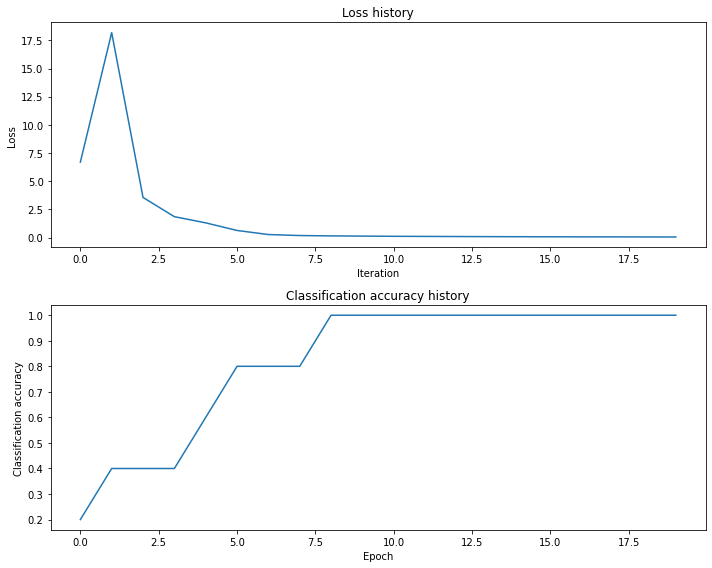

In [19]:
# Plot the loss function and train accuracy
plt.subplot(2, 1, 1)
plt.plot(train_loss)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_accuracy)
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')

plt.tight_layout()
plt.show()